In [72]:
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook as tqdm

movies_df = pd.read_csv(r"C:\Users\dashp\PythonDS\Recommendation Systeem\movies.csv")
ratings_df = pd.read_csv(r"C:\Users\dashp\PythonDS\Recommendation Systeem\ratings.csv")
tags_df= pd.read_csv(r"C:\Users\dashp\PythonDS\Recommendation Systeem\tags.csv")

In [52]:
print(movies_df.shape)
movies_df.head()

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [53]:
print(ratings_df.shape)
ratings_df.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [54]:
print(tags_df.shape)
tags_df.head()

(3683, 4)


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [55]:
tag_counts = tags_df['tag'].value_counts()

filtered_tags = tag_counts[tag_counts > 10]

print(filtered_tags)

In Netflix queue      131
atmospheric            36
thought-provoking      24
superhero              24
funny                  23
surreal                23
Disney                 23
religion               22
sci-fi                 21
quirky                 21
dark comedy            21
psychology             21
suspense               20
twist ending           19
visually appealing     19
crime                  19
politics               18
mental illness         16
music                  16
time travel            16
comedy                 15
aliens                 15
dark                   15
dreamlike              14
space                  14
mindfuck               14
black comedy           13
heist                  13
emotional              13
high school            12
action                 12
anime                  12
disturbing             12
satire                 12
court                  12
journalism             12
Stephen King           12
Shakespeare            12
classic     

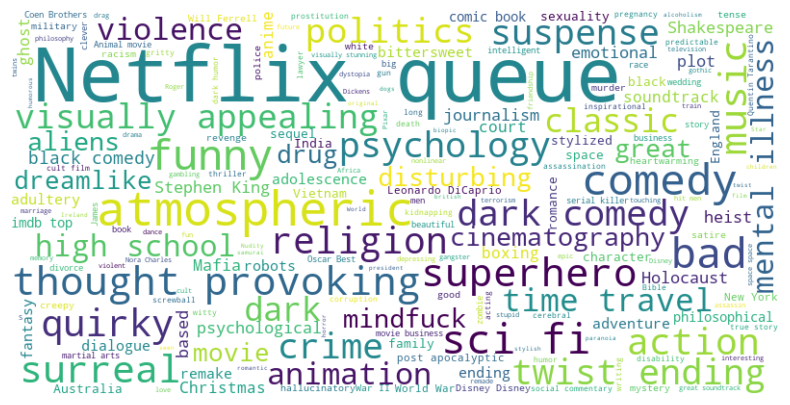

In [73]:
from wordcloud import WordCloud

df = tags_df['tag']

tags_text = ' '.join(df)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tags_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


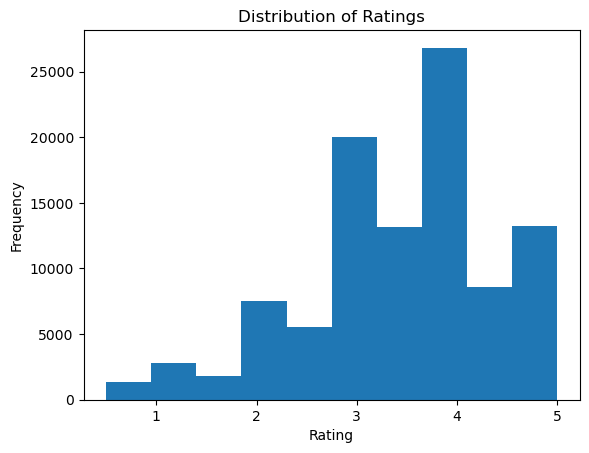

In [57]:
ratings_summary = ratings_df['rating'].describe()

import matplotlib.pyplot as plt
plt.hist(ratings_df['rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


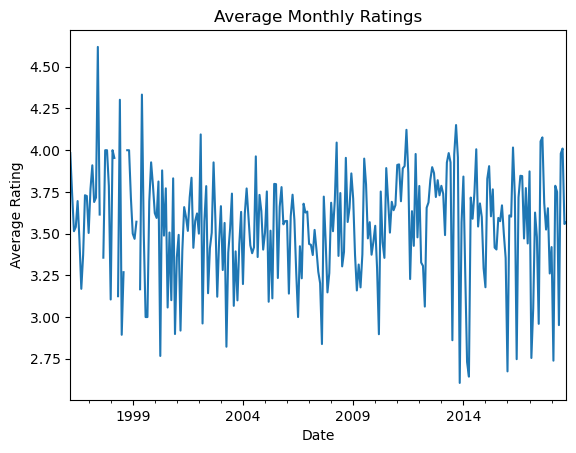

In [58]:
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')

ratings_timeseries = ratings_df.set_index('timestamp')['rating']
ratings_timeseries.resample('M').mean().plot(title='Average Monthly Ratings')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.show()


In [71]:
from sklearn.cluster import KMeans

# Example: K-means clustering on movie ratings
kmeans = KMeans(n_clusters=5, random_state=0)
ratings_df['cluster'] = kmeans.fit_predict(ratings_df[['userId', 'rating']])
print(ratings_df.head())


C:\Users\dashp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   userId  movieId  rating           timestamp  cluster
0       1        1     4.0 2000-07-30 18:45:03        1
1       1        3     4.0 2000-07-30 18:20:47        1
2       1        6     4.0 2000-07-30 18:37:04        1
3       1       47     5.0 2000-07-30 19:03:35        1
4       1       50     5.0 2000-07-30 18:48:51        1


In [60]:
import pandas as pd
import statsmodels.api as sm

merged_df = pd.merge(ratings_df, movies_df, on='movieId', how='inner')

X = pd.get_dummies(merged_df['genres'], drop_first=True)
X = sm.add_constant(X)  
y = merged_df['rating']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     10.64
Date:                Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                        07:00:43   Log-Likelihood:            -1.4242e+05
No. Observations:              100836   AIC:                         2.867e+05
Df Residuals:                   99885   BIC:                         2.958e+05
Df Model:                         950                                         
Covariance Type:            nonrobust                                         
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [61]:
import pandas as pd



most_used_tags = tags_df['tag'].value_counts().head(10)  # Example: Top 3 most used tags
filtered_movie_ids = tags_df[tags_df['tag'].isin(most_used_tags.index)]['movieId']

average_rating = ratings_df[ratings_df['movieId'].isin(filtered_movie_ids)]['rating'].mean()

print(f"Average rating received by movies with most used tags: {average_rating:.2f}")


Average rating received by movies with most used tags: 3.83


In [62]:

most_used_tags = tags_df['tag'].value_counts().head(10)  # Example: Top 10 most used tags

tag_ratings = {}

for tag in most_used_tags.index:
    filtered_movie_ids = tags_df[tags_df['tag'] == tag]['movieId']
    average_rating = ratings_df[ratings_df['movieId'].isin(filtered_movie_ids)]['rating'].mean()
    tag_ratings[tag] = average_rating

for tag, rating in tag_ratings.items():
    print(f"Tag: {tag}, Average Rating: {rating:.2f}")


Tag: In Netflix queue, Average Rating: 3.86
Tag: atmospheric, Average Rating: 4.03
Tag: thought-provoking, Average Rating: 4.09
Tag: superhero, Average Rating: 3.48
Tag: funny, Average Rating: 3.84
Tag: surreal, Average Rating: 4.01
Tag: Disney, Average Rating: 3.69
Tag: religion, Average Rating: 3.76
Tag: sci-fi, Average Rating: 4.01
Tag: quirky, Average Rating: 4.00


In [63]:

class Loader(Dataset):
    def __init__(self, ratings_df):
        self.ratings = ratings_df.copy()
        self.users = self.ratings.userId.unique()
        self.movies = self.ratings.movieId.unique()

        self.user_mapping = {user: idx for idx, user in enumerate(self.users)}
        self.movie_mapping = {movie: idx for idx, movie in enumerate(self.movies)}

        self.ratings['userId'] = self.ratings['userId'].map(self.user_mapping)
        self.ratings['movieId'] = self.ratings['movieId'].map(self.movie_mapping)

        self.idx2movieid = {idx: movie for movie, idx in self.movie_mapping.items()}

        self.x = self.ratings[['userId', 'movieId']].values
        self.y = self.ratings['rating'].values
        self.x, self.y = torch.tensor(self.x), torch.tensor(self.y, dtype=torch.float32)

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return len(self.ratings)

class MatrixFactorization(torch.nn.Module):
    def __init__(self, n_users, n_items, n_factors=20):
        super(MatrixFactorization, self).__init__()
        self.user_factors = torch.nn.Embedding(n_users, n_factors)
        self.item_factors = torch.nn.Embedding(n_items, n_factors)

    def forward(self, data):
        users, items = data[:, 0], data[:, 1]
        user_embeddings = self.user_factors(users)
        item_embeddings = self.item_factors(items)
        return (user_embeddings * item_embeddings).sum(1)

train_set = Loader(ratings_df)
train_loader = DataLoader(train_set, batch_size=128, shuffle=True)

n_users = len(train_set.users)
n_items = len(train_set.movies)
model = MatrixFactorization(n_users, n_items, n_factors=8)

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 150
for epoch in range(num_epochs):
    total_loss = 0
    for batch in train_loader:
        x_batch, y_batch = batch
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {total_loss:.4f}')






Epoch 1, Loss: 15938.7872
Epoch 2, Loss: 14409.8090
Epoch 3, Loss: 13296.9558
Epoch 4, Loss: 12460.7314
Epoch 5, Loss: 11793.6689
Epoch 6, Loss: 11211.1847
Epoch 7, Loss: 10632.0555
Epoch 8, Loss: 9960.6569
Epoch 9, Loss: 9095.9063
Epoch 10, Loss: 7979.8499
Epoch 11, Loss: 6673.4752
Epoch 12, Loss: 5370.0715
Epoch 13, Loss: 4261.8234
Epoch 14, Loss: 3410.5188
Epoch 15, Loss: 2779.1438
Epoch 16, Loss: 2308.9594
Epoch 17, Loss: 1954.5073
Epoch 18, Loss: 1681.6180
Epoch 19, Loss: 1469.0344
Epoch 20, Loss: 1300.6648
Epoch 21, Loss: 1165.5977
Epoch 22, Loss: 1056.0683
Epoch 23, Loss: 966.1664
Epoch 24, Loss: 891.8612
Epoch 25, Loss: 829.6202
Epoch 26, Loss: 777.0496
Epoch 27, Loss: 732.6814
Epoch 28, Loss: 694.5147
Epoch 29, Loss: 661.7921
Epoch 30, Loss: 633.3311
Epoch 31, Loss: 608.7504
Epoch 32, Loss: 586.7814
Epoch 33, Loss: 567.6836
Epoch 34, Loss: 550.7825
Epoch 35, Loss: 535.8021
Epoch 36, Loss: 522.2086
Epoch 37, Loss: 510.0324
Epoch 38, Loss: 499.0078
Epoch 39, Loss: 489.1188
Epoch

In [64]:
trained_movie_embeddings = model.item_factors.weight.data.numpy()


In [65]:
kmeans = KMeans(n_clusters=10, random_state=0, n_init=10).fit(trained_movie_embeddings)


In [69]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_true_epoch = train_set.y.numpy()
y_pred_epoch = model(train_set.x).detach().numpy()
mse = mean_squared_error(y_true_epoch, y_pred_epoch)
rmse = np.sqrt(mse)
    
print(f'Epoch {epoch+1}, Loss: {total_loss:.4f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}')




Epoch 150, Loss: 298.2025, MSE: 0.36, RMSE: 0.60


In [66]:
for cluster in range(10):
    print(f'Cluster #{cluster}:')
    movies_in_cluster = [train_set.idx2movieid[i] for i, label in enumerate(kmeans.labels_) if label == cluster]
    top_movies = movies_df[movies_df['movieId'].isin(movies_in_cluster)].head(10)
    print(top_movies[['movieId', 'title']])
    print('---')


Cluster #0:
     movieId                                            title
7          8                              Tom and Huck (1995)
34        38                              It Takes Two (1995)
42        46             How to Make an American Quilt (1995)
43        47                      Seven (a.k.a. Se7en) (1995)
62        70                       From Dusk Till Dawn (1996)
63        71                                 Fair Game (1995)
75        83  Once Upon a Time... When We Were Colored (1995)
78        87                         Dunston Checks In (1996)
90       102                                 Mr. Wrong (1996)
132      159                                  Clockers (1995)
---
Cluster #1:
     movieId                                              title
28        29  City of Lost Children, The (Cité des enfants p...
46        50                         Usual Suspects, The (1995)
70        78                         Crossing Guard, The (1995)
74        82                    An